In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from scipy.stats import pearsonr
import joblib
from sklearn.datasets import fetch_openml 

In [2]:
def build_model(feature,target):
    model = LinearRegression()
    return Pipeline([
        ('SimpleImputer',SimpleImputer(strategy='mean')),
        ('multi linear regression',model),
    ])

In [5]:
model = build_model(df_train.select_dtypes(include=[np.number]),df_train[['SalePrice']])
features = SelectFromModel(model)

In [51]:
load_model = joblib.load('linearregression.pkl')
load_model

Pipeline(steps=[('SimpleImputer', SimpleImputer()),
                ('multi linear regression', LinearRegression())])

In [7]:
def load_dataset(path):
    return  pd.read_csv(path,index_col='Id') ## setting the index to be the Id
df_train = load_dataset('../train.csv')

In [10]:
df_train['GrLivArea']

Id
1       1710
2       1262
3       1786
4       1717
5       2198
        ... 
1456    1647
1457    2073
1458    2340
1459    1078
1460    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [12]:
corr = pearsonr(df_train['GrLivArea'],df_train['SalePrice'])
corr

PearsonRResult(statistic=np.float64(0.7086244776126522), pvalue=np.float64(4.518033646776416e-223))

<Axes: >

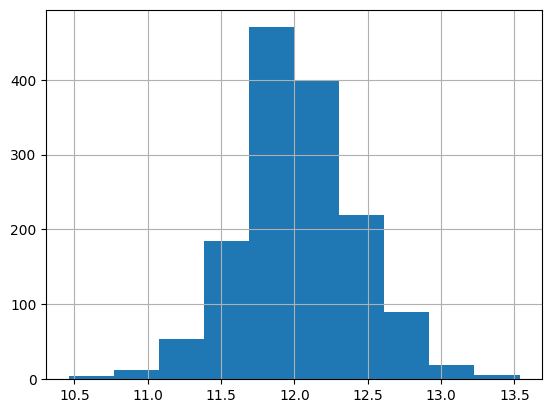

In [8]:
log = FunctionTransformer(np.log,inverse_func=np.exp)
log.transform(df_train['SalePrice']).hist()

In [12]:
def shuffle(data_set,ratio_size=0.2):
    premutation = np.random.permutation(len(data_set))
    test_size = int(ratio_size * len(data_set))
    test_indecies = premutation[:test_size]
    train_indecies = premutation[test_size:]
    return data_set.iloc[train_indecies], data_set.iloc[test_indecies]
train_data,test_data = shuffle(df_train)

len(train_data)/len(test_data)

4.0

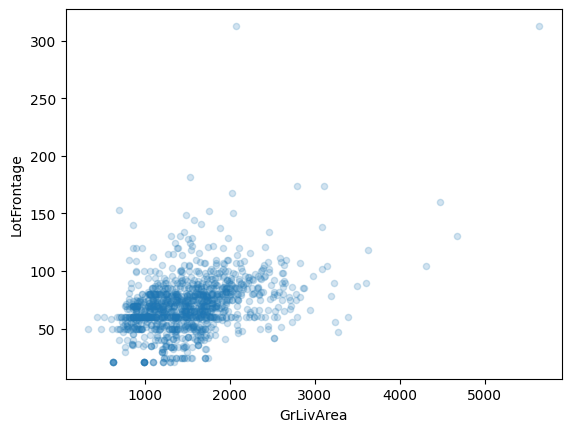

In [29]:
df_train.plot(kind='scatter',x='GrLivArea',y='LotFrontage',alpha=0.2);

In [19]:
pd.cut(df_train['GrLivArea'],bins=[0,10,20,30,40,np.inf],labels=[1,2,3,4,5])

Id
1       5
2       5
3       5
4       5
5       5
       ..
1456    5
1457    5
1458    5
1459    5
1460    5
Name: GrLivArea, Length: 1460, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [5]:
def column_details(column_name):
    print(df_train[column_name].unique())
    print(df_train[column_name].info())

column_details('OverallCond')

[5 8 6 7 4 2 3 9 1]
<class 'pandas.core.series.Series'>
Index: 1460 entries, 1 to 1460
Series name: OverallCond
Non-Null Count  Dtype
--------------  -----
1460 non-null   int64
dtypes: int64(1)
memory usage: 22.8 KB
None


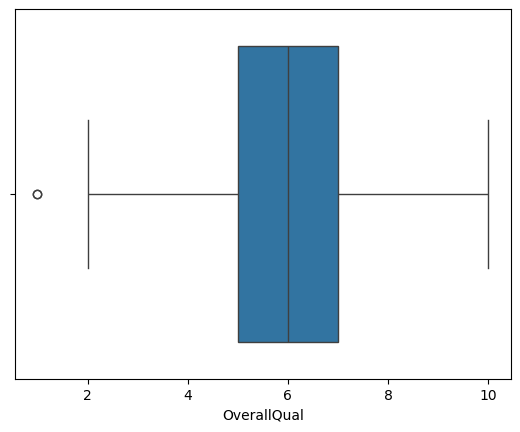

In [8]:
## drop columns = ['Alley','Street']
## Alley -> majority of the values are NaN.
## Street -> all of the values are Pave, execpt three values.
## Utilities -> all of the values are AllPub.
## LowQualFinSF -> all of the values are AllPub.

# data = df_train.drop(columns='id')
sns.boxplot(data=df_train,x='OverallQual');

In [11]:
imputer = SimpleImputer(strategy='constant',fill_value='NoFence')
df_train['Fence']=imputer.fit_transform(df_train[['Fence']]).squeeze()

In [13]:
num_corr = df_train.select_dtypes(exclude=['object']).corr()

<Axes: >

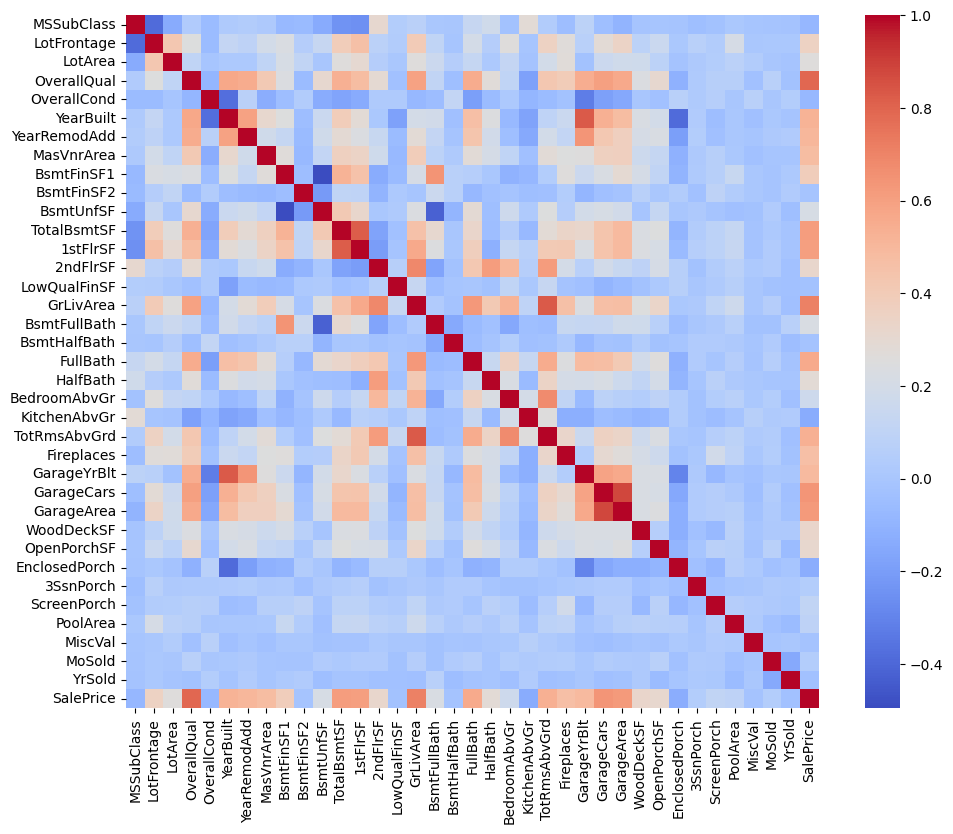

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(num_corr,square=True,cmap='coolwarm')

In [15]:
pd.DataFrame(df_train['TotalBsmtSF'].describe())

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


In [48]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df_train[['GrLivArea']])
print(scaled.max())
print(scaled.min())

7.855574356961303
-2.2491201474608564


In [59]:
normalize = MinMaxScaler()
normalized = normalize.fit_transform(df_train[['GrLivArea']])

Text(0.5, 1.0, 'Mansour ')

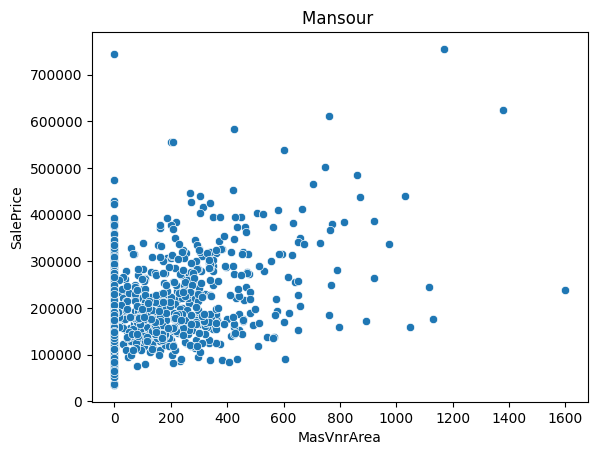

In [90]:
sns.scatterplot(x=df_train['MasVnrArea'],y=df_train['SalePrice']);
plt.title('Mansour ')

In [73]:
model = build_model(df_train[['MasVnrArea']],df_train[['SalePrice']])
calculate_metrics(model,df_train[['MasVnrArea']],df_train[['SalePrice']])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

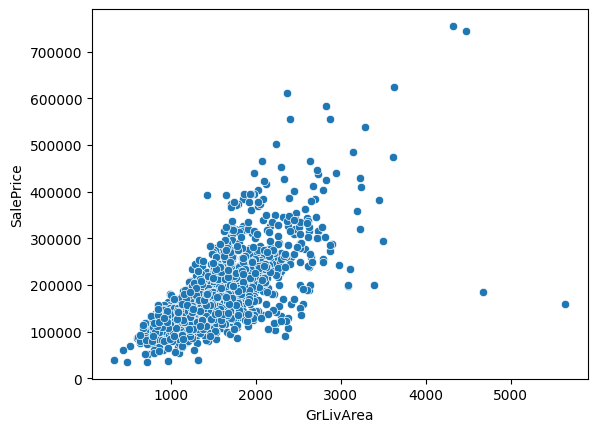

In [17]:
sns.scatterplot(x=df_train['GrLivArea'],y=df_train['SalePrice'])

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

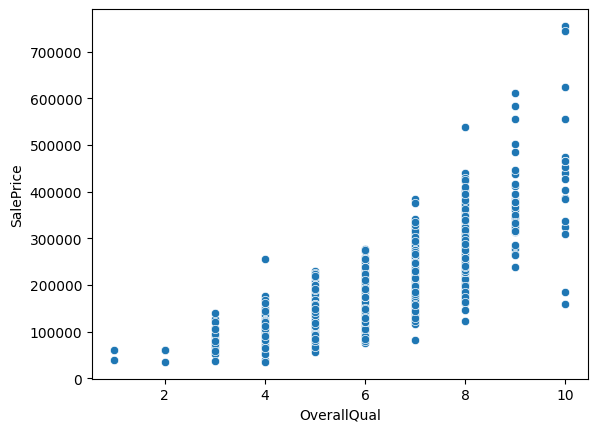

In [18]:
sns.scatterplot(x=df_train['OverallQual'],y=df_train['SalePrice'])

In [21]:
model = build_model(df_train[['TotalBsmtSF']],df_train[['SalePrice']])
model

37.65


LinearRegression()

In [35]:
int(mean_squared_error(df_train[['SalePrice']],y_pred))

2360934371

In [37]:
pd.DataFrame({
        'r2_score' :  [1,2],
        'Mean Squared Error' :[2,3] ,
        'Mean Absolute Error' : [4,5],
    })

,r2_score,Mean Squared Error,Mean Absolute Error
0,1,2,4
1,2,3,5


In [39]:

calculate_metrics(model,df_train[['TotalBsmtSF']],df_train[['SalePrice']])

,r2_score,Mean Squared Error,Mean Absolute Error
0,0.376481,3.932402e+09,46434.699036


In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [27]:
lr_model = LinearRegression()
lr_model.fit(df_train[['OverallQual']],df_train[['SalePrice']])
lr_model

LinearRegression()

In [29]:
y_pred = lr_model.predict(df_train[['OverallQual']])
r2_score(df_train['SalePrice'],y_pred)

0.625651892462118

In [146]:
def plotScatter(df,model,feature,target):
    plt.figure(figsize=(10,8))
    sns.scatterplot(x=df[feature],y=df[target])
    y=model.coef_[0][0] * df[feature] + model.intercept_
    sns.lineplot(x=df[feature],y=y ,color='r',linestyle='--');

In [1]:
df_train

NameError: name 'df_train' is not defined